##### Predicting Video Game hits and Exploratory Data Analysis

In [200]:
# We analyze VG sales, use LR / RFC models to predict whether a game will sell over 1 million units (a "hit" game), and  
#implement a prediction model to separate winners from losers
# identify which features are most correlated to VG hits.
# Data exploration and analysis
# Prediction model
# Which 2016 games can still become hits

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
from pandas import Series
from math import ceil



In [201]:
# Dataset Description nderstanding the Data

# Name : The Name of the game
# Platform : The Platform it was released on. (Playstation, Xbox…)
# Year_of_release : When the game was released
# Genre : The genre of the game
# Publisher : The publisher of the game
# NA_Sales : Number of units sold in millions in the U.S.
# EU_Sales : Number of units sold in millions in the E.U.
# JP_Sales : Number of units sold in millions in Japan
# Other_Sales : Number of units sold in millions other than previous categories
# Global_Sales : Total number of units sold in millions
# Critic_Score : The critic rating for the video game
# Critic_Count : Number of critics that gave a rating for the video game
# Developer : The developer of the video game
# Rating : The ESRB rating


In [202]:
df = pd.read_csv('VideoGamesSales.csv', encoding="utf-8")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
dfa = df
dfa = dfa.copy()

In [204]:
# Evaluting shape of our data
df.shape
# We can see our dataset has 16719 rows and 16 columns

(16719, 16)

In [205]:
# List of columns
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [206]:
# Basic information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [207]:
#stats about the numeric columns of our data set.
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [208]:
# Find Columns with missing values
df.isnull().sum()

# Here, we notice that User_Count has the most N/A values (about 9,100) showing that it will be difficult to work with since it will have very little significant values. 
#It is a bit interesting how both Critic_Count and Critic_Score have the same amount of N/A values. 
# However,it is more understandable for Rating to have many N/A values as many games are difficult to find a rating for.

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [209]:
# Data Cleaning 

# Use dropna
df.dropna(subset=['Year_of_Release'], inplace=True)
df.dropna(subset=['Publisher'], inplace=True)
df.dropna(subset=['Genre'], inplace=True)
# We will start by filling the missing values of Critic_Score and Critic_Count.
df.Critic_Score = df.Critic_Score.fillna(df.Critic_Score.median())
df.Critic_Count = df.Critic_Count.fillna(df.Critic_Count.median())
# Cleaning User Score and User Count
df.User_Score = df.User_Score.fillna(0)
df.User_Count = df.User_Count.fillna(df.User_Count.median())
# Replace the missing values of Rating and Developer with Unknown.
df.Rating.fillna('Unknown',inplace=True)
df.Developer.fillna('Unknown',inplace=True)

df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [210]:
# Exploratory Analysis and Visualization


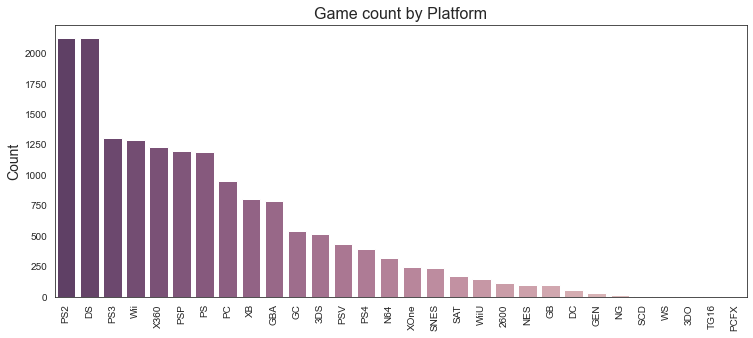

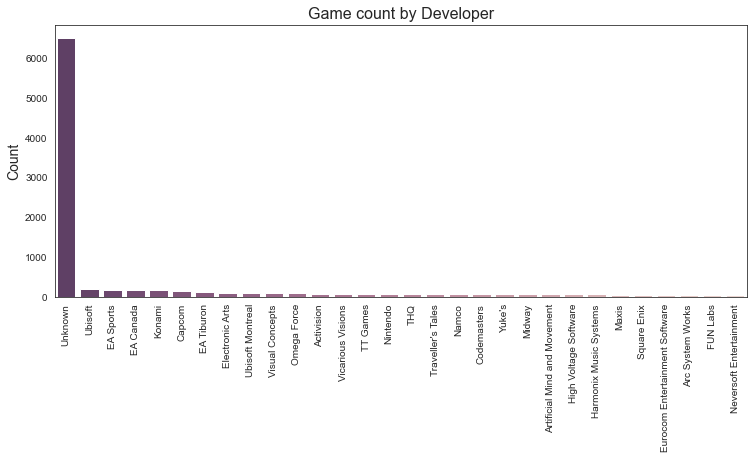

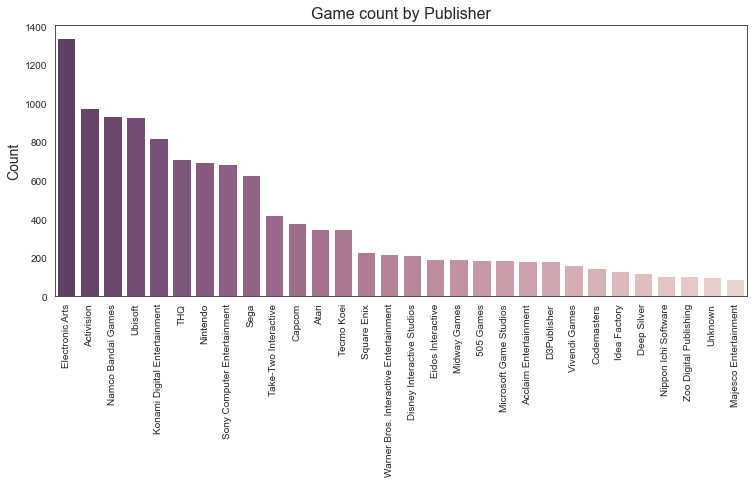

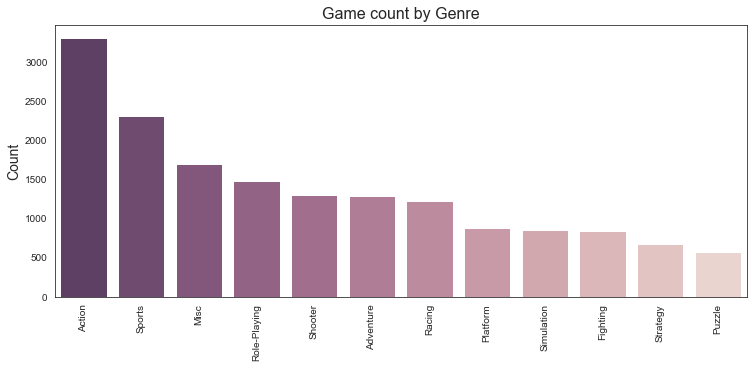

In [211]:
#Top values in the dataset
# By platform, developer, publisher and genre.
cols = ['Platform', 'Developer', 'Publisher', 'Genre']

for col in cols:
    chart = df[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Genre' else 30), dark=0.3, light=.85, reverse=True)).set_title(('Game count by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')

In [212]:
# Sales vs critic scores
# By platform, developer, publisher, and genre.
def score_group(score):
    if score >= 90:
        return '90-100'
    elif score >= 80:
        return '80-89'
    elif score >= 70:
        return '70-79'
    elif score >= 60:
        return '60-69'
    elif score >= 50:
        return '50-59'
    else:
        return '0-49'
    
dfh = df.dropna(subset=['Critic_Score']).reset_index(drop=True)
dfh['Score_Group'] = dfh['Critic_Score'].apply(lambda x: score_group(x))


def in_top(x):
    if x in pack:
        return x
    else:
        pass
    
def width(x):
    if x == 'Platform':
        return 14.4
    elif x == 'Developer':
        return 13.2
    elif x == 'Publisher':
        return 11.3
    elif x == 'Genre':
        return 13.6

def height(x):
    if x == 'Genre':
        return 8
    else:
        return 9

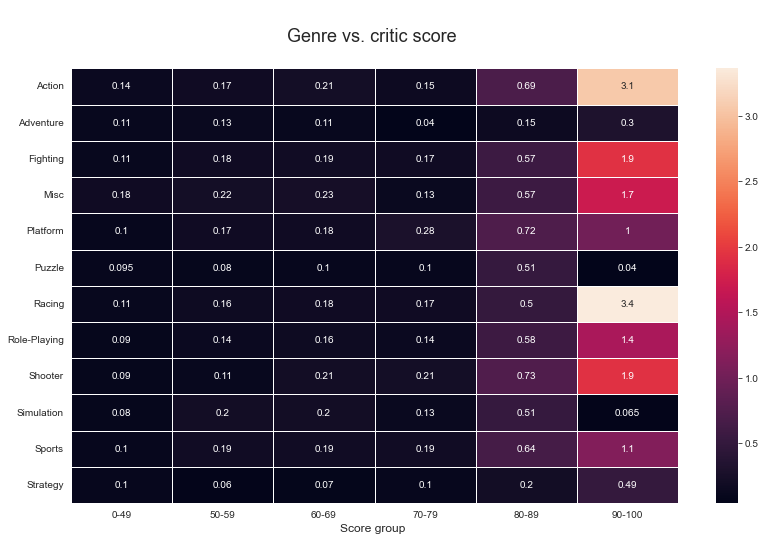

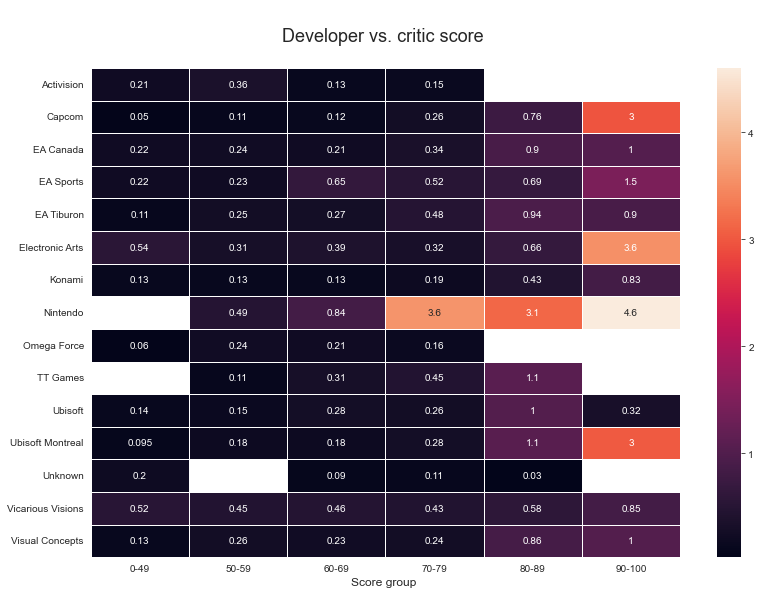

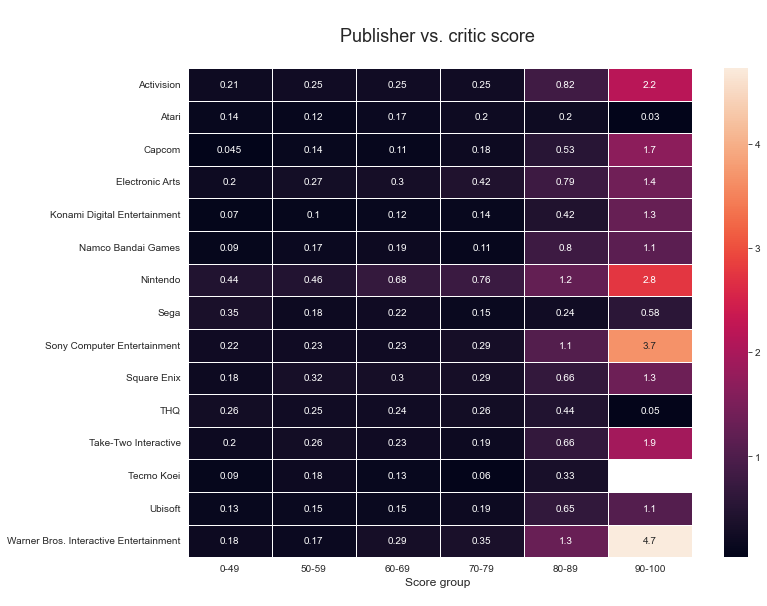

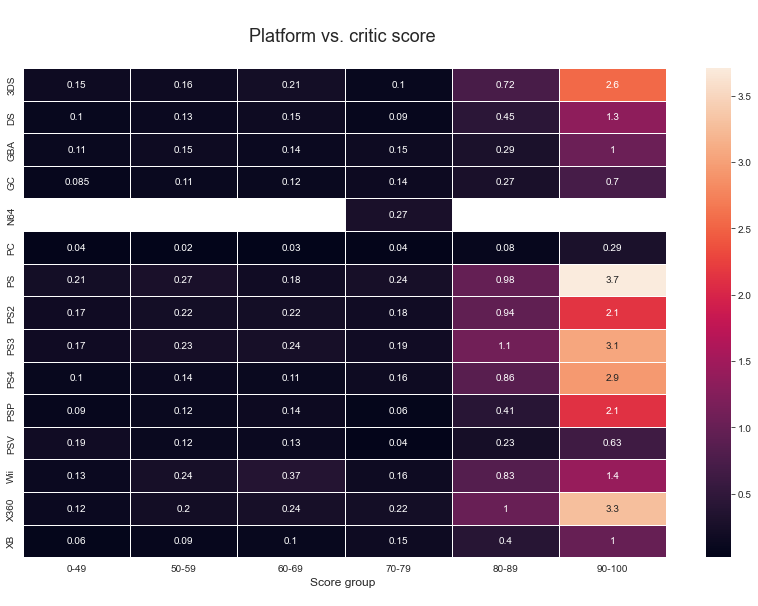

In [213]:
cols = ['Genre', 'Developer', 'Publisher', 'Platform']
for col in cols:
    pack = []
    top = dfh[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()[:15]
    for x in top[col]:
        pack.append(x)
    dfh[col] = dfh[col].apply(lambda x: in_top(x))
    dfh_platform = dfh[[col, 'Score_Group', 'Global_Sales']].groupby([col, 'Score_Group']).median().reset_index().pivot(col, "Score_Group", "Global_Sales")
    plt.figure(figsize=(width(col), height(col)))
    sns.heatmap(dfh_platform, annot=True, fmt=".2g", linewidths=.5).set_title((' \n'+col+' vs. critic score \n'), fontsize=18)
    plt.ylabel('', fontsize=14)
    plt.xlabel('Score group \n', fontsize=12)
    pack = []

In [214]:
# Dataset correlations
# Conversion of categorical columns into numeric codes
cols = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
for col in cols:
    uniques = df[col].value_counts().keys()
    uniques_dict = {}
    ct = 0
    for i in uniques:
        uniques_dict[i] = ct
        ct += 1

    for k, v in uniques_dict.items():
        df.loc[df[col] == k, col] = v

In [215]:
df1 = df[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
df1 = df1.dropna().reset_index(drop=True)
df1 = df1.astype('float64')

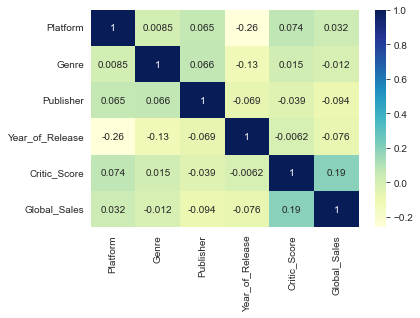

In [216]:
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
plt.show()

[(0.0, 4.0), (50.0, 95.0)]

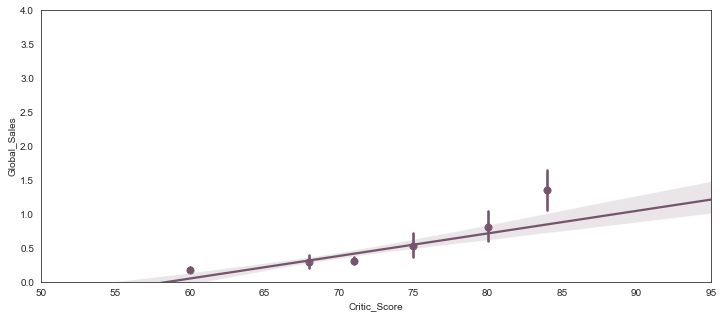

In [217]:
# Critic Score and Year of Release are correlated
# Critic Score - Global sales
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=df1.loc[df1.Year_of_Release >= 2014],
            truncate=True, x_bins=15, color="#75556c").set(ylim=(0, 4), xlim=(50, 95))

In [218]:
# The relationship looks much clearer now.
# It's interesting how the slope gets steeper in the 80's. It seems once a game gets a high critic score, every additional point has a higher impact. Go big or go home, right?
# Looks like critic scores will be a good feature for the prediction model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import svm

In [219]:
dfb = dfa[['Name','Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
dfb = dfb.dropna().reset_index(drop=True)
df2 = dfb[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
df2['Hit'] = df2['Global_Sales']
df2.drop('Global_Sales', axis=1, inplace=True)

In [220]:
# Defining hits as those with sales above 1 million units
# This will be the target in our prediction model, 
# where we'll predict if a game will be a hit or not.
def hit(sales):
    if sales >= 1:
        return 1
    else:
        return 0

df2['Hit'] = df2['Hit'].apply(lambda x: hit(x))

In [221]:
# Predicting model
# For predicting Video Games with unit sales of 1 million or higher (hits)
df2[0:5]


,Platform,Genre,Publisher,Year_of_Release,Critic_Score,Hit
0,Wii,Sports,Nintendo,2006.0,76.0,1
1,Wii,Racing,Nintendo,2008.0,82.0,1
2,Wii,Sports,Nintendo,2009.0,80.0,1
3,DS,Platform,Nintendo,2006.0,89.0,1
4,Wii,Misc,Nintendo,2006.0,58.0,1


In [222]:
from pandas import get_dummies
df_copy = pd.get_dummies(df2)
df_copy[:5]

,Year_of_Release,Critic_Score,Hit,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,...,Publisher_Xplosiv,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Yuke's,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_id Software,Publisher_inXile Entertainment
0,2006.0,76.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2008.0,82.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2009.0,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2006.0,89.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006.0,58.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [223]:
df3 = df_copy
y = df3['Hit'].values
df3 = df3.drop(['Hit'],axis=1)
X = df3.values

In [224]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=2)

In [225]:
# Predictions using Random Forest Classifier
radm = RandomForestClassifier(random_state=2).fit(Xtrain, ytrain)
y_val_1 = radm.predict_proba(Xtest)
print(y_val_1)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_1).idxmax(axis=1).values== ytest)/len(ytest))

[[0.86833333 0.13166667]
 [0.96       0.04      ]
 [0.9        0.1       ]
 ...
 [0.83       0.17      ]
 [0.92       0.08      ]
 [1.         0.        ]]
Validation accuracy:  0.8668058455114822


In [226]:
# Predictions using Logistic Regression
log_reg = LogisticRegression().fit(Xtrain, ytrain)
y_val_2 = log_reg.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_2).idxmax(axis=1).values== ytest)/len(ytest))

Validation accuracy:  0.8697286012526096


In [227]:
all_predictions = log_reg.predict(Xtest)
print(classification_report(ytest, all_predictions))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1997
           1       0.70      0.37      0.49       398

    accuracy                           0.87      2395
   macro avg       0.80      0.67      0.71      2395
weighted avg       0.86      0.87      0.85      2395



[Text(0.5, 2.5, 'Predicted Value'), Text(11.5, 0.5, 'Expected Value')]

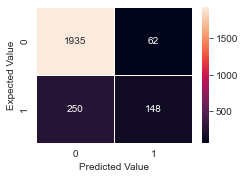

In [228]:
fig, ax = plt.subplots(figsize=(3.5,2.5))
sns.heatmap(confusion_matrix(ytest, all_predictions), annot=True, linewidths=.5, ax=ax, fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')


In [229]:
# Which 2016 games can still become hits?
not_hit_copy = df_copy[df_copy['Hit'] == 0]

In [230]:
df4 = not_hit_copy
y = df4['Hit'].values
df4 = df4.drop(['Hit'],axis=1)
X = df4.values

In [231]:
pred = log_reg.predict_proba(X)

In [232]:
dfb = dfb[dfb['Global_Sales'] < 1]
dfb['Hit_Probability'] = pred[:,1]
dfb = dfb[dfb['Year_of_Release'] == 2016]
dfb.sort_values(['Hit_Probability'], ascending=[False], inplace=True)
dfb = dfb[['Name', 'Platform', 'Hit_Probability']]

In [233]:
# Top 10 games with highest probability of becoming hits:
dfb[:10].reset_index(drop=True)

,Name,Platform,Hit_Probability
0,Titanfall 2,PS4,0.765566
1,Titanfall 2,XOne,0.698382
2,Plants vs. Zombies: Garden Warfare 2,PS4,0.603114
3,Kirby: Planet Robobot,3DS,0.595881
4,Fast Racing Neo,WiiU,0.586668
5,Plants vs. Zombies: Garden Warfare 2,XOne,0.542458
6,Dishonored 2,PS4,0.500294
7,Skylanders Imaginators,PS4,0.489026
8,Dishonored 2,XOne,0.462219
9,BioShock The Collection,PS4,0.446564


In [234]:
# Top 10 games from 2016 with lowest probability of becoming hits:
dfb[:-11:-1].reset_index(drop=True)

,Name,Platform,Hit_Probability
0,RollerCoaster Tycoon World,PC,0.001752
1,Dino Dini's Kick Off Revival,PS4,0.001808
2,Bus Simulator 16,PC,0.002386
3,The Technomancer,PC,0.003448
4,7 Days to Die,XOne,0.003955
5,Dead or Alive Xtreme 3: Fortune,PS4,0.004197
6,Pro Cycling Manager 2016,PC,0.005281
7,Homefront: The Revolution,PC,0.005737
8,Pro Evolution Soccer 2017,PC,0.006545
9,Sherlock Holmes: The Devil's Daughter,PC,0.006706
